# Generation of tables and figures

In [1]:
import pickle

v_acc_d = {}

f = open('results/RfamNovel_constant.pckl', 'rb')
v_acc_d.update({'Constant' : pickle.load(f)})
f.close()

f = open('results/Rfam2Novel_random.pckl', 'rb')
v_acc_d.update({'Random' : pickle.load(f)})
f.close()

f = open('results/RfamNovel_new.pckl', 'rb')
v_acc_d.update({'New' : pickle.load(f)})
f.close()

import numpy as np
from tensorflow import keras
from sklearn import preprocessing


train_labels=np.load("train_labels.npy")
val_labels=np.load("val_labels.npy")
test_labels=np.load("test_labels.npy")

num_classes = len(np.unique(train_labels))

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_num = le.transform(train_labels)
val_labels_num = le.transform(val_labels)
test_labels_num = le.transform(test_labels)

train_labels_bin = keras.utils.to_categorical(train_labels_num, num_classes)
val_labels_bin = keras.utils.to_categorical(val_labels_num, num_classes)
test_labels_bin = keras.utils.to_categorical(test_labels_num, num_classes)





### Plots the accuracy/MCC vs boundary noise

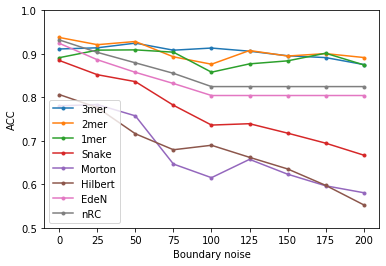

In [3]:
# plots accuracy or MCC VS bnoise
from sklearn.metrics import *
from ExpConfiguration import *


import matplotlib.pyplot as plt
y_true = np.argmax(test_labels_bin, axis=1)

# CHANGE HERE plot parameters
nl=3  # cnn layer to plot
#padd = 'Constant'
padd = 'Random'
#padd = 'New' 
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score

v_acc = v_acc_d[padd]
fig, ax = plt.subplots()
plt.xlabel('Boundary noise')
plt.ylabel(pmetric)
#plt.title('CNN n. layers = '+str(nl))
plt.ylim(0.5, 1) 
for en in seqEncoders:
    mtr=[]
    for bn in bnoise:
        y_pred = v_acc[str(nl)][en['filename']][str(bn)]
        mtr.append(pmetricf(y_true,y_pred))
        #print(en['filename'],bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))
            
    ax.plot(bnoise, mtr, label=en['filename'],marker='o',markersize=3)

# add Eden results
mtr=[]
for bn in bnoise:
    y_pred = np.loadtxt('eden/test_pred_eden_'+str(bn)+'.txt',dtype='str')
    y_true = np.loadtxt('eden/test_labels_eden_'+str(bn)+'.txt',dtype='str')
    mtr.append(pmetricf(y_true,y_pred))
    #mtr.append(accuracy_score(y_true,y_pred))
    #print('EdeN',bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))

ax.plot(bnoise, mtr, label='EdeN',marker='o',markersize=3)
# add nRC results
mtr=[]
for bn in bnoise:
    y_pred = np.loadtxt('nrc/test_pred_nrc_'+str(bn)+'.txt',dtype='str')
    y_true = np.loadtxt('nrc/test_labels_nrc_'+str(bn)+'.txt',dtype='str')
    mtr.append(pmetricf(y_true,y_pred))
    #print('nRC',bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))


ax.plot(bnoise, mtr, label='nRC',marker='o',markersize=3)
ax.legend()
#plt.savefig('figs/plot_bnoise-m'+pmetric+'_nl'+str(nl)+'_p'+padd+'.pdf')




### Plots accuracy with different padding schemas

In [ ]:
from sklearn.metrics import *
from ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

# CHANGE HERE plot parameters
nl=3  # cnn layer to plot
bn = 0 # boundary noise
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)
index = ['New', 'Constant', 'Random']
cols = {}
for en in seqEncoders:
    y_pred = v_acc_d['New'][str(nl)][en['filename']][str(bn)]
    pnew = pmetricf(y_true,y_pred)
    y_pred = v_acc_d['Constant'][str(nl)][en['filename']][str(bn)]
    pcns = pmetricf(y_true,y_pred)
    y_pred = v_acc_d['Random'][str(nl)][en['filename']][str(bn)]
    prnd = pmetricf(y_true,y_pred)

    performance = [pnew,pcns,prnd]
    cols.update({en['filename'] : performance})



df = pd.DataFrame(cols, index=index)
ax = df.plot.bar(rot=0,ylim=(0.5,1))

ax.legend(loc='lower left')
#plt.title('Input padding symbol')
plt.ylabel('ACC')
plt.savefig('figs/plot-padding.pdf')




### Plots accuracy/MCC with different CNN n. of layers

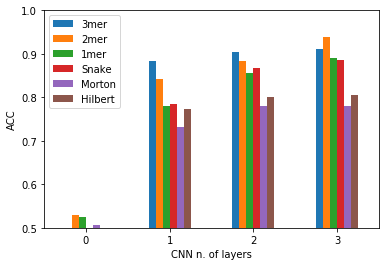

In [4]:
from sklearn.metrics import *
from ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

# CHANGE HERE plot parameters
bn = 0 # boundary noise
padd = 'New'  # padding to plot
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)
index = ['0', '1', '2','3']
cols = {}
for en in seqEncoders:
    y_pred = v_acc[str(0)][en['filename']][str(bn)]
    p0 = pmetricf(y_true,y_pred)
    y_pred = v_acc[str(1)][en['filename']][str(bn)]
    p1 = pmetricf(y_true,y_pred)
    y_pred = v_acc[str(2)][en['filename']][str(bn)]
    p2 = pmetricf(y_true,y_pred)
    y_pred = v_acc[str(3)][en['filename']][str(bn)]
    p3 = pmetricf(y_true,y_pred)
    
    performance = [p0,p1,p2,p3]
    cols.update({en['filename'] : performance})



df = pd.DataFrame(cols, index=index)
ax = df.plot.bar(rot=0,ylim=(0.5,1))

ax.legend(loc='upper left')
#plt.title('CNN number of layers')
plt.ylabel('ACC')
plt.xlabel('CNN n. of layers')
plt.savefig('figs/plot-cnnlayers.pdf')



## Generates tables with precisions, recalls, and F1-measures

In [ ]:
# tables precision recall f1 and macro/weighted averages 
# at certain bnoise and n CNN layers 

from sklearn.metrics import *
import pandas as pd
import numpy as np
from ExpConfiguration import *

# CHANGE HERE plot parameters
nl=3  # cnn layer 
bn = 0 # boundary noise
padd = 'New'  # padding to plot


v_acc = v_acc_d[padd]
y_true = np.argmax(test_labels_bin, axis=1)
y_true = le.inverse_transform(y_true)

dfs = {}
for en in seqEncoders:
    y_pred = v_acc[str(nl)][en['filename']][str(bn)]
    y_pred = le.inverse_transform(y_pred)
    cr = classification_report(y_true,y_pred,output_dict=True,digits=2)
    df1 = pd.DataFrame(cr).drop(index=['support'])
    df1.drop(columns=['accuracy'])
    df1.index = ['P','R','F1']
    dfs[en['filename']] = df1

y_pred = np.loadtxt('eden/test_pred_eden_'+str(bn)+'.txt',dtype='str')
y_true = np.loadtxt('eden/test_labels_eden_'+str(bn)+'.txt',dtype='str')
cr = classification_report(y_true,y_pred,output_dict=True,digits=2)
df1 = pd.DataFrame(cr).drop(index=['support'])
df1.drop(columns=['accuracy'])
df1.index = ['P','R','F1']
dfs['EdeN'] = df1

y_pred = np.loadtxt('nrc/test_pred_nrc_'+str(bn)+'.txt',dtype='str')
y_true = np.loadtxt('nrc/test_labels_nrc_'+str(bn)+'.txt',dtype='str')
cr = classification_report(y_true,y_pred,output_dict=True,digits=2)
df1 = pd.DataFrame(cr) #.drop(index=['support'])
df1.drop(columns=['accuracy'])
df1.index = ['P','R','F1','Class size']
dfs['nRC'] = df1

df = pd.concat(dfs)
df = df.transpose()
df.astype({('nRC','Class size'): 'int32'})

with open('tables/prf-table_bn'+str(bn)+'_nl'+str(nl)+'_p'+padd+'.tex','w') as tf:
    tf.write(df.to_latex(float_format="{:0.2f}".format))

df


# Results with RNAGCN/nRC dataset and improved architecture

In [ ]:
import pickle

v_acc_d = {}

f = open('results/RNAGCN_nRC_ModelImproved_new.pckl', 'rb')
v_acc_d.update({'Improved' : pickle.load(f)})
f.close()

f = open('results/RNAGCN_nRC_new.pckl', 'rb')
v_acc_d.update({'Standard' : pickle.load(f)})
f.close()

import numpy as np
from tensorflow import keras
from sklearn import preprocessing

train_labels=np.load("dataset_nRC_train_labels.npy")
test_labels=np.load("dataset_nRC_test_labels.npy")

num_classes = len(np.unique(train_labels))
print('Total classes: ',num_classes)

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_num = le.transform(train_labels)
test_labels_num = le.transform(test_labels)

train_labels_bin = keras.utils.to_categorical(train_labels_num, num_classes)
test_labels_bin = keras.utils.to_categorical(test_labels_num, num_classes)


In [ ]:
from sklearn.metrics import *
from ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

# CHANGE HERE plot parameters
bn = 0 # boundary noise
padd = 'New'  # padding to plot
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)
index = ['Standard', 'Improved']
cols = {}
for en in seqEncoders:
    y_pred = v_acc_d['Standard'][en['filename']][str(bn)]
    p0 = pmetricf(y_true,y_pred)
    y_pred = v_acc_d['Improved'][en['filename']][str(bn)]
    p1 = pmetricf(y_true,y_pred)
    
    performance = [p0,p1]
    cols.update({en['filename'] : performance})



df = pd.DataFrame(cols, index=index)



In [ ]:
df